In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

warnings.filterwarnings('ignore')

In [2]:
day = pd.read_csv("day.csv")

In [3]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
day.shape

(730, 16)

In [5]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


<Figure size 2000x2000 with 0 Axes>

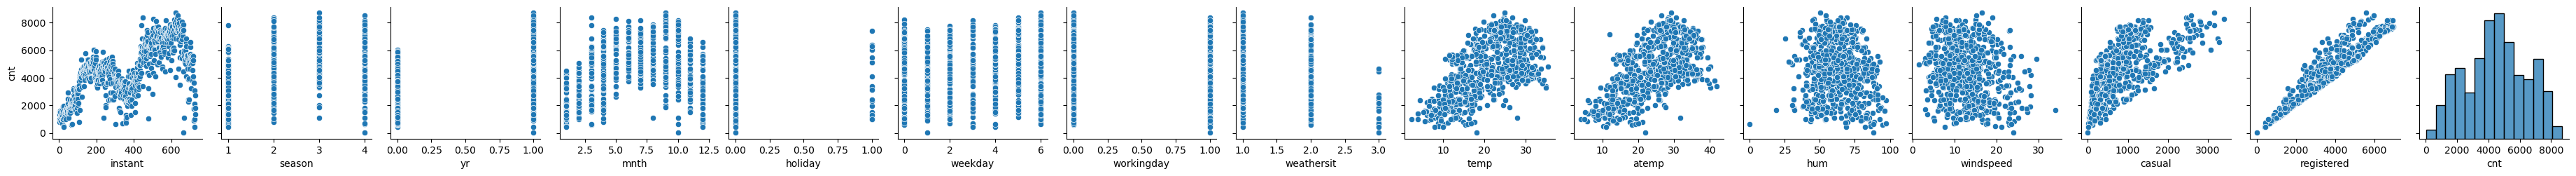

In [7]:
plt.figure(figsize=(20,20))
sns.pairplot(day, y_vars=['cnt'])


<Axes: xlabel='weathersit', ylabel='cnt'>

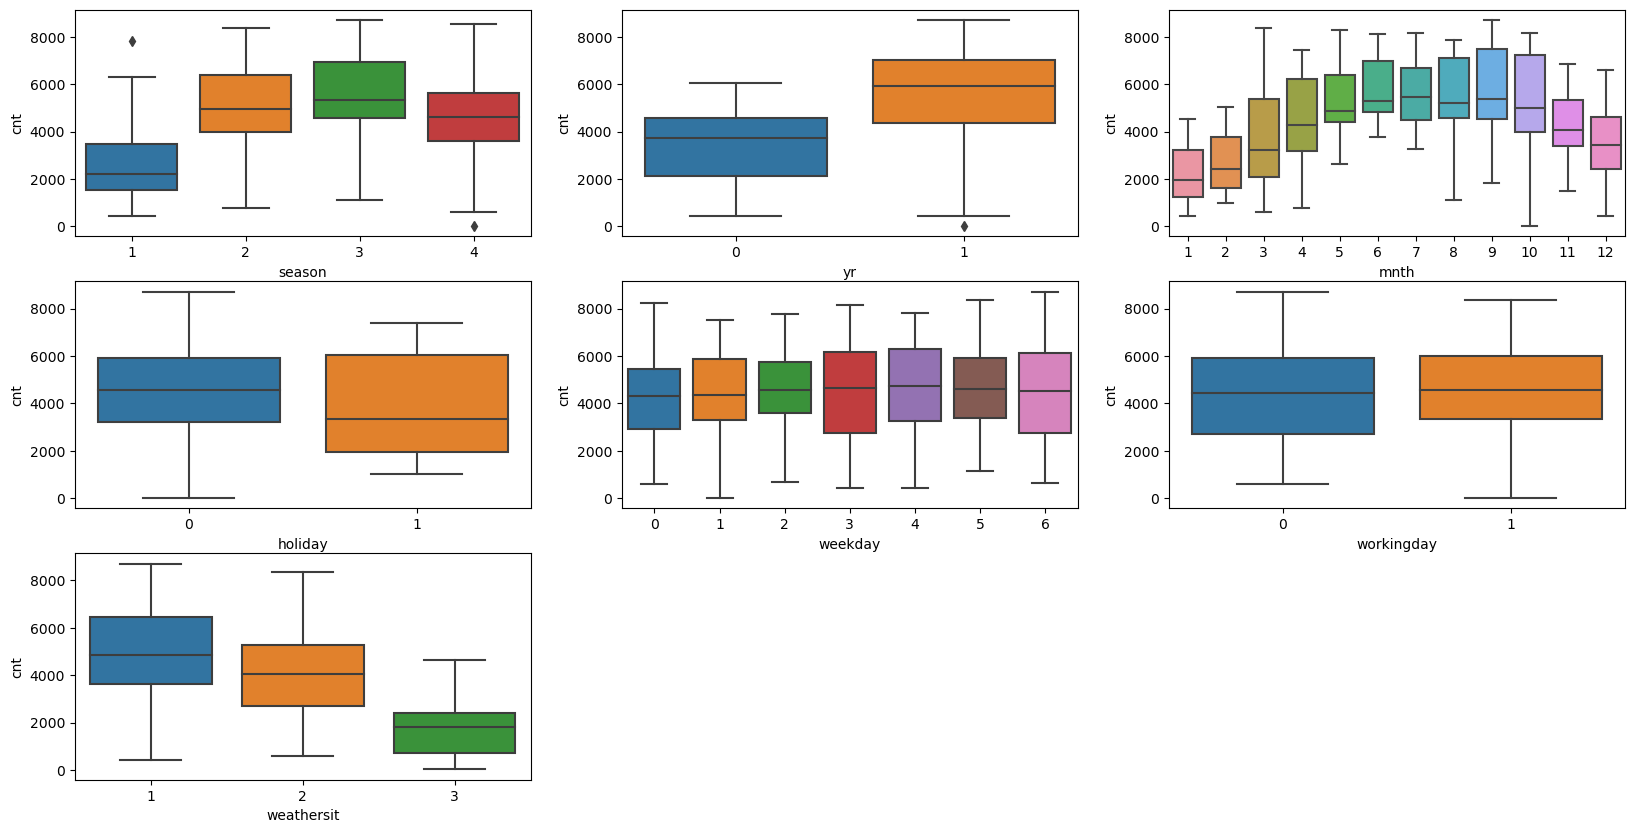

In [8]:
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt', data=day)
plt.subplot(3,3,2)
sns.boxplot(x='yr', y='cnt', data=day)
plt.subplot(3,3,3)
sns.boxplot(x='mnth', y='cnt', data=day)
plt.subplot(3,3,4)
sns.boxplot(x='holiday', y='cnt', data=day)
plt.subplot(3,3,5)
sns.boxplot(x='weekday', y='cnt', data=day)
plt.subplot(3,3,6)
sns.boxplot(x='workingday', y='cnt', data=day)
plt.subplot(3,3,7)
sns.boxplot(x='weathersit', y='cnt', data=day)

### Splitting into traint and test data

In [9]:
df_train, df_test = train_test_split(day, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)


(510, 16)
(220, 16)


### Rescaling the data points


In [10]:
scaler = MinMaxScaler()

num_vars = ['season', 'mnth', 'weekday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,368.680392,0.504575,0.507843,0.503743,0.025490,0.498366,0.676471,0.201961,0.537440,0.513156,0.650480,0.320883,0.254689,0.523781,0.513499
std,209.596164,0.370078,0.500429,0.315038,0.157763,0.336182,0.468282,0.273944,0.225858,0.212410,0.145846,0.169803,0.206015,0.227896,0.224421
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,187.250000,0.333333,0.000000,0.181818,0.000000,0.166667,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.094179,0.353487,0.356420
50%,373.000000,0.666667,1.000000,0.545455,0.000000,0.500000,1.000000,0.000000,0.542596,0.529718,0.653714,0.296763,0.212740,0.525123,0.518638
75%,552.750000,0.666667,1.000000,0.818182,0.000000,0.833333,1.000000,0.500000,0.735215,0.688457,0.754830,0.414447,0.327415,0.696073,0.684710
max,729.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dropping unncessary features


In [11]:
df_train = df_train.drop(['instant', 'dteday'], axis=1)
print(df_train.shape)

(510, 14)


In [12]:
df_test = df_test.drop(['instant', 'dteday'], axis = 1)
print(df_test.shape)

(220, 14)


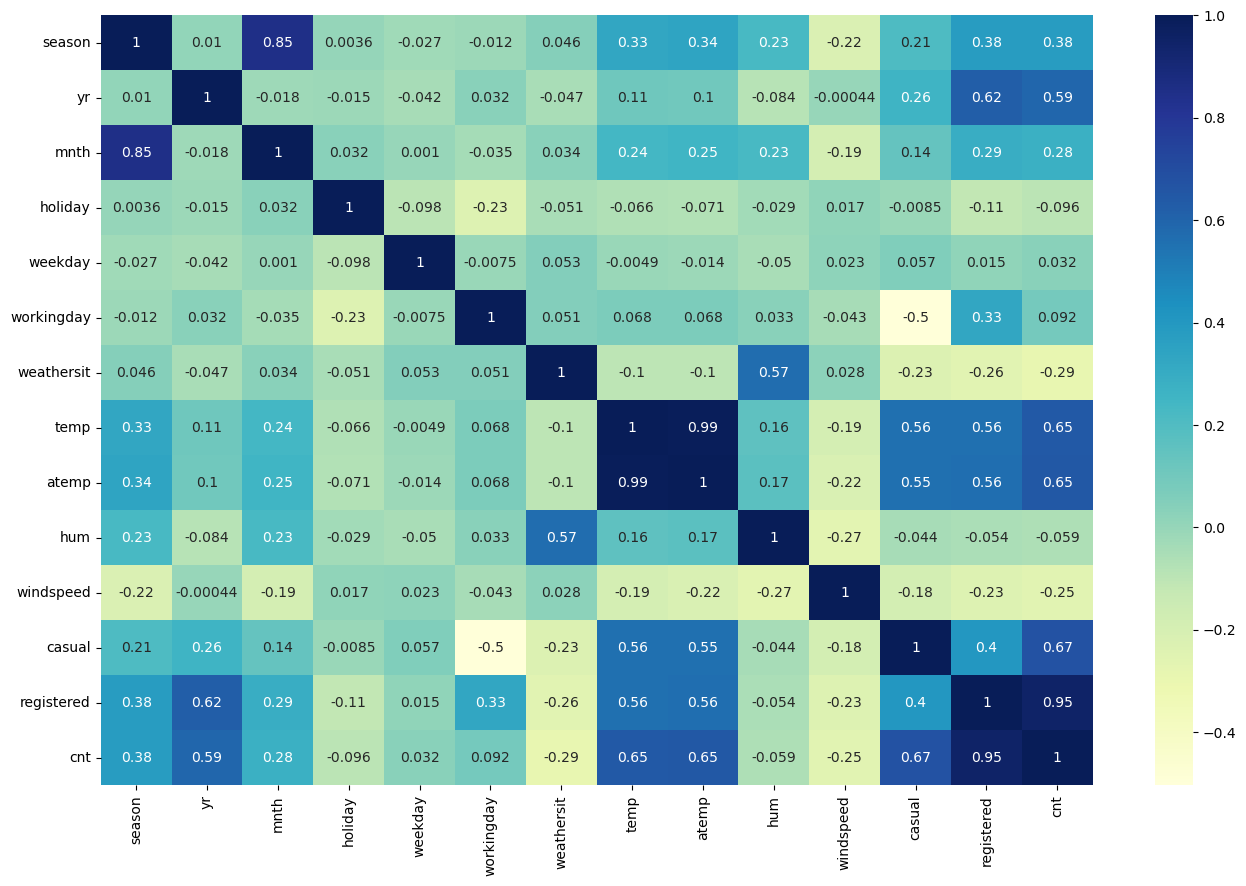

In [13]:
plt.figure(figsize=(16,10))
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [14]:
y_train = df_train.pop('cnt')
X_train = df_train

In [15]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [16]:
X_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
576,0.666667,1,0.545455,0,0.333333,1,0.0,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220
426,0.000000,1,0.181818,0,1.000000,0,0.5,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145
728,0.000000,1,1.000000,0,0.000000,0,0.0,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869
482,0.333333,1,0.272727,0,1.000000,0,0.5,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701
111,0.333333,0,0.272727,0,0.833333,1,0.5,0.345824,0.318819,0.751824,0.380981,0.053337,0.214554


### Performing recursive feature elemination

In [17]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=8)
rfe = rfe.fit(X_train, y_train)

In [18]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('season', True, 1),
 ('yr', True, 1),
 ('mnth', False, 5),
 ('holiday', False, 6),
 ('weekday', False, 2),
 ('workingday', False, 4),
 ('weathersit', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', False, 3),
 ('windspeed', True, 1),
 ('casual', True, 1),
 ('registered', True, 1)]

In [19]:
col = X_train.columns[rfe.support_]
col

Index(['season', 'yr', 'weathersit', 'temp', 'atemp', 'windspeed', 'casual',
       'registered'],
      dtype='object')

In [20]:
excluded_cols = X_train.columns[~rfe.support_]

In [21]:
X_train_rfe = X_train[col]
X_train_rfe

,season,yr,weathersit,temp,atemp,windspeed,casual,registered
576,0.666667,1,0.0,0.815169,0.766351,0.264686,0.294422,0.899220
426,0.000000,1,0.5,0.442393,0.438975,0.255342,0.290765,0.446145
728,0.000000,1,0.0,0.245101,0.200348,0.663106,0.110332,0.203869
482,0.333333,1,0.5,0.395666,0.391735,0.188475,0.340750,0.444701
111,0.333333,0,0.5,0.345824,0.318819,0.380981,0.053337,0.214554
...,...,...,...,...,...,...,...,...
578,0.666667,1,0.0,0.863973,0.824359,0.187140,0.298994,0.903552
53,0.000000,0,0.0,0.202618,0.218747,0.111379,0.041756,0.253826
350,1.000000,0,0.5,0.248216,0.223544,0.431816,0.083206,0.352873
79,0.333333,0,0.5,0.462664,0.434043,0.529881,0.121609,0.239099


In [22]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [23]:
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.859e+31
Date:                Mon, 25 Sep 2023   Prob (F-statistic):               0.00
Time:                        20:59:37   Log-Likelihood:                 17344.
No. Observations:                 510   AIC:                        -3.467e+04
Df Residuals:                     501   BIC:                        -3.463e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.29e-16   7.85e-17     -2.919      0.0

In [24]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
5,atemp,50.67
4,temp,50.12
0,const,18.21
8,registered,3.83
2,yr,2.41
7,casual,1.68
1,season,1.38
3,weathersit,1.25
6,windspeed,1.17


In [25]:
X_train_new = X_train_rfe.drop("temp", axis=1)

In [26]:
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.087e+31
Date:                Mon, 25 Sep 2023   Prob (F-statistic):               0.00
Time:                        20:59:37   Log-Likelihood:                 17439.
No. Observations:                 510   AIC:                        -3.486e+04
Df Residuals:                     502   BIC:                        -3.483e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.327e-17   6.43e-17      1.294      0.1

In [27]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,const,17.80
7,registered,3.82
2,yr,2.41
4,atemp,2.32
6,casual,1.67
1,season,1.38
3,weathersit,1.25
5,windspeed,1.12


In [28]:
X_train_new = X_train_new.drop("windspeed", axis=1)
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.000e+32
Date:                Mon, 25 Sep 2023   Prob (F-statistic):               0.00
Time:                        20:59:37   Log-Likelihood:                 17699.
No. Observations:                 510   AIC:                        -3.538e+04
Df Residuals:                     503   BIC:                        -3.535e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.267e-16   2.88e-17     14.820      0.0

In [29]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,const,9.90
6,registered,3.68
2,yr,2.34
4,atemp,2.32
5,casual,1.65
1,season,1.38
3,weathersit,1.24


In [30]:
y_train_predict = lm.predict(X_train_rfe)

<Axes: ylabel='Density'>

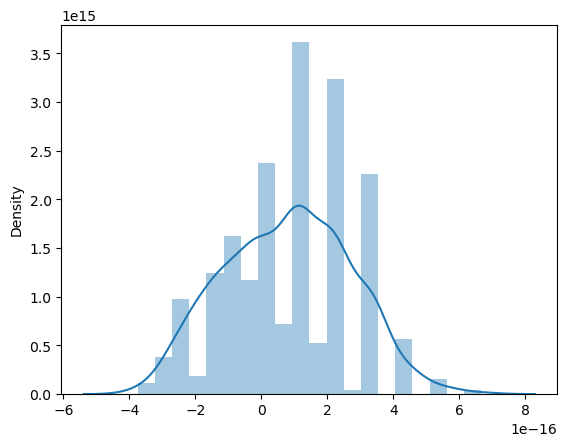

In [31]:
sns.distplot((y_train - y_train_predict), bins=20)

### Test Data

In [36]:
num_vars = ['season', 'mnth', 'weekday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

df_test.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.487879,0.481818,0.499174,0.036364,0.502273,0.700000,0.186364,0.546074,0.530791,0.508362,0.418803,0.254977,0.507234,0.517923
std,0.370602,0.500809,0.311120,0.187620,0.330843,0.459303,0.269102,0.248645,0.227648,0.200875,0.187683,0.209104,0.236879,0.239498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.272727,0.000000,0.166667,0.000000,0.000000,0.329310,0.333953,0.361079,0.284201,0.096810,0.323729,0.361045
50%,0.333333,0.000000,0.454545,0.000000,0.500000,1.000000,0.000000,0.545492,0.543153,0.491299,0.403318,0.215231,0.505614,0.520681
75%,0.666667,1.000000,0.727273,0.000000,0.833333,1.000000,0.500000,0.756414,0.719758,0.650989,0.523975,0.346957,0.656308,0.687956
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
y_test = df_test.pop('cnt')
X_test = df_test

X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
184,1.0,0.666667,0,0.545455,1,0.166667,0,0.5,0.837241,0.778767,0.534223,0.149393,0.898559,0.397068
535,1.0,0.333333,1,0.454545,0,0.500000,1,0.0,0.911423,0.855132,0.470417,0.231142,0.253749,0.765284
299,1.0,1.000000,0,0.818182,0,0.666667,1,0.5,0.496221,0.492359,0.777843,0.443398,0.067921,0.309888
221,1.0,0.666667,0,0.636364,0,0.500000,1,0.0,0.890387,0.805661,0.236659,0.449707,0.257277,0.540237
152,1.0,0.333333,0,0.454545,0,0.666667,1,0.0,0.821739,0.749249,0.070765,0.682387,0.213761,0.592639


In [38]:
X_test_sm = X_test_sm.drop(['hum', 'windspeed', 'temp', 'holiday', 'weekday', 'workingday', 'mnth'], axis=1)

### Predicting on test data

In [39]:
y_test_predict = lm.predict(X_test_sm)

In [42]:
r2_score(y_true=y_test, y_pred=y_test_predict)

0.9923333867187308

<Axes: ylabel='Density'>

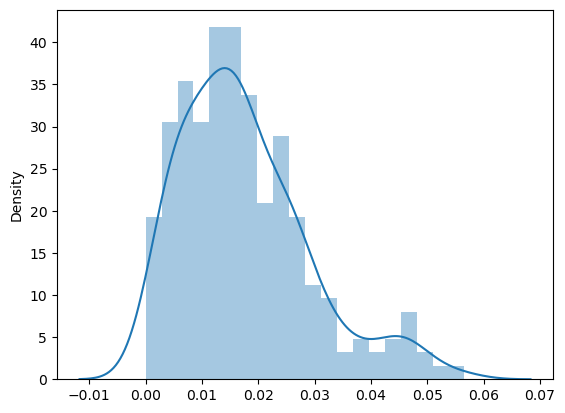

In [47]:
sns.distplot((y_test - y_test_predict), bins=20)

Text(0, 0.5, 'y_test_predict')

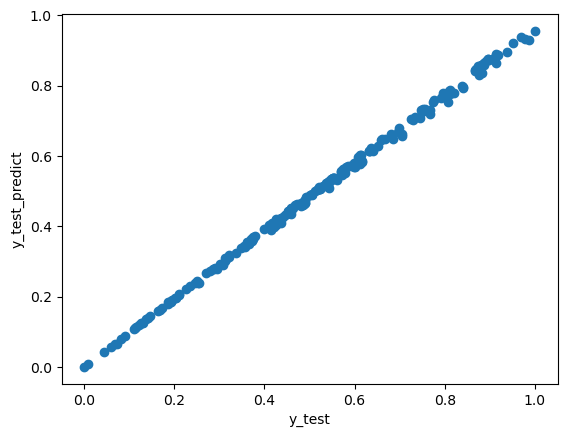

In [46]:
fig = plt.figure()
plt.scatter(y_test, y_test_predict)
plt.xlabel('y_test')
plt.ylabel('y_test_predict')